In [1]:
import pandas as pd
import numpy as np

In [2]:
car = pd.read_csv('quikr_car.csv')

In [3]:
car.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel


Quality
year has many non-year values
-year object to int
- price has Ask for Price
- Price object to int
- kms_driven has kms with integers
-kms_driven object to int
-kms_driven has nan values
-fuel type has nan values
- keep first 3 words of name

In [4]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        892 non-null    object
 1   company     892 non-null    object
 2   year        892 non-null    object
 3   Price       892 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: object(6)
memory usage: 41.9+ KB


In [5]:
car['year'].unique()

array(['2007', '2006', '2018', '2014', '2015', '2012', '2013', '2016',
       '2010', '2017', '2008', '2011', '2019', '2009', '2005', '2000',
       '...', '150k', 'TOUR', '2003', 'r 15', '2004', 'Zest', '/-Rs',
       'sale', '1995', 'ara)', '2002', 'SELL', '2001', 'tion', 'odel',
       '2 bs', 'arry', 'Eon', 'o...', 'ture', 'emi', 'car', 'able', 'no.',
       'd...', 'SALE', 'digo', 'sell', 'd Ex', 'n...', 'e...', 'D...',
       ', Ac', 'go .', 'k...', 'o c4', 'zire', 'cent', 'Sumo', 'cab',
       't xe', 'EV2', 'r...', 'zest'], dtype=object)

In [6]:
#remove the other data from the year and just convert into to the int

car = car[car['year'].str.isnumeric()]

car['year'] =car['year'] = car['year'].astype(int)


In [7]:
car.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 842 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        842 non-null    object
 1   company     842 non-null    object
 2   year        842 non-null    int32 
 3   Price       842 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: int32(1), object(5)
memory usage: 42.8+ KB


In [8]:
car['year'].unique()

array([2007, 2006, 2018, 2014, 2015, 2012, 2013, 2016, 2010, 2017, 2008,
       2011, 2019, 2009, 2005, 2000, 2003, 2004, 1995, 2002, 2001])

In [9]:
#Now remove the ask for price in the price column

car = car[car['Price'] != 'Ask For Price']


In [10]:
car['Price'] = car['Price'].str.replace(',','').astype(int)

In [11]:
car

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,80000,"45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,425000,40 kms,Diesel
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,325000,"28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,575000,"36,000 kms",Diesel
6,Ford Figo,Ford,2012,175000,"41,000 kms",Diesel
...,...,...,...,...,...,...
886,Toyota Corolla Altis,Toyota,2009,300000,"1,32,000 kms",Petrol
888,Tata Zest XM Diesel,Tata,2018,260000,"27,000 kms",Diesel
889,Mahindra Quanto C8,Mahindra,2013,390000,"40,000 kms",Diesel
890,Honda Amaze 1.2 E i VTEC,Honda,2014,180000,Petrol,NaN


In [12]:
#now remove the comma from it and convert into int
car['kms_driven'] = car['kms_driven'].str.split(' ').str[0].str.replace(',','')
car = car[car['kms_driven'].str.isnumeric()]
car['kms_driven'] = car['kms_driven'].astype(int)

C:\Users\Uzair ali\AppData\Local\Temp\ipykernel_5304\3088015460.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car['kms_driven'] = car['kms_driven'].astype(int)


In [13]:
#now in the fuel type remove the -

car = car[~car['fuel_type'].isna()]

In [14]:
car.describe()

,year,Price,kms_driven
count,816.000000,8.160000e+02,816.000000
mean,2012.444853,4.117176e+05,46275.531863
std,4.002992,4.751844e+05,34297.428044
min,1995.000000,3.000000e+04,0.000000
25%,2010.000000,1.750000e+05,27000.000000
50%,2013.000000,2.999990e+05,41000.000000
75%,2015.000000,4.912500e+05,56818.500000
max,2019.000000,8.500003e+06,400000.000000


In [15]:
car[car['Price']>6e6]

,name,company,year,Price,kms_driven,fuel_type
562,Mahindra XUV500 W6,Mahindra,2014,8500003,45000,Diesel


In [16]:
#keep everthing that is less than 60 lacs

car = car[car['Price']<6e6].reset_index(drop=True)


In [17]:
car.shape

(815, 6)

In [18]:
#now the name of is the first three words of 

car['name'] = car['name'].str.split(' ').str.slice(0,3).str.join(' ')

In [19]:
#let save the cleaned data in the csv file

car.to_csv('cleaned_car.csv')


In [20]:
#except the price we need to predict the price
#drop the price
X= car.drop(columns='Price')
y = car['Price']


In [21]:
X

,name,company,year,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,40,Diesel
2,Hyundai Grand i10,Hyundai,2014,28000,Petrol
3,Ford EcoSport Titanium,Ford,2014,36000,Diesel
4,Ford Figo,Ford,2012,41000,Diesel
...,...,...,...,...,...
810,Maruti Suzuki Ritz,Maruti,2011,50000,Petrol
811,Tata Indica V2,Tata,2009,30000,Diesel
812,Toyota Corolla Altis,Toyota,2009,132000,Petrol
813,Tata Zest XM,Tata,2018,27000,Diesel


In [22]:
# now train the model
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
ohe = OneHotEncoder()
ohe.fit(X[['name','company','fuel_type']])
column_tr = make_column_transformer((OneHotEncoder(categories=ohe.categories_),['name','company','fuel_type']), remainder='passthrough')
scores = []

for i in range(1000):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)
    lr = LinearRegression()
    pipe = make_pipeline(column_tr,lr)
    pipe.fit(X_train,y_train)
    y_pred = pipe.predict(X_test)
    scores.append(r2_score(y_test,y_pred))
    print(r2_score(y_test,y_pred),i)

In [24]:
ohe = OneHotEncoder()
ohe.fit(X[['name','company','fuel_type']])

OneHotEncoder()

In [25]:
column_tr = make_column_transformer((OneHotEncoder(categories=ohe.categories_),['name','company','fuel_type']), remainder='passthrough')

In [26]:
lr = LinearRegression()

In [27]:
pipe = make_pipeline(column_tr,lr)

In [28]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Audi A3 Cabriolet', 'Audi A4 1.8', 'Audi A4 2.0', 'Audi A6 2.0',
       'Audi A8', 'Audi Q3 2.0', 'Audi Q5 2.0', 'Audi Q7', 'BMW 3 Series',
       'BMW 5 Series', 'BMW 7 Series', 'BMW X1', 'BMW X1 sDrive20d',
       'BMW X1 xDrive20d', 'Chevrolet Beat', 'Chevrolet Beat...
                                                                            array(['Audi', 'BMW', 'Chevrolet', 'Datsun', 'Fiat', 'Force', 'Ford',
       'Hindustan', 'Honda', 'Hyundai', 'Jaguar', 'Jeep', 'Land',
       'Mahindra', 'Maruti', 'Mercedes', 'Mini', 'Mitsubishi', 'Nissan',
       'Renault', 'Skoda', 'Tata', 'Toyota', 'Volkswagen', 'Volvo'],
      dtype=object),
                                                                            array(['Diesel', 'LPG', 'Petrol'], dtype=object)]),
                                                  ['name', 'company',
                                                   'fuel_type'])])),
                ('linearregression', LinearRegression())])

In [29]:
y_pred = pipe.predict(X_test)

In [30]:
y_pred

array([ 4.45060843e+05,  7.03401488e+04,  1.39543315e+06,  3.02135296e+05,
        4.30887689e+05,  6.93322908e+05,  2.61236487e+05,  3.85273437e+05,
        2.80969550e+05,  4.07639937e+05,  4.84952756e+05,  1.68941026e+05,
        5.00780908e+05,  2.94520599e+05,  5.26089757e+05,  3.42040856e+05,
        5.00780908e+05,  3.79370028e+05,  2.56680206e+05,  2.02069921e+05,
        1.52308318e+05,  2.74621336e+05,  5.92592103e+05,  4.06998760e+05,
        1.41823570e+05,  2.78976070e+05,  2.51260721e+05,  3.51632193e+05,
        2.98059964e+05,  3.10184964e+05,  5.76227019e+05,  5.24983441e+05,
        2.89712899e+05,  4.44906533e+05,  2.26870187e+05,  4.69547396e+05,
        6.12631194e+05,  1.55332047e+05,  1.25141273e+04,  5.47315471e+05,
        9.04360719e+04,  3.83682899e+05,  2.46997407e+05,  4.11124189e+05,
        3.87872391e+05,  1.06186661e+06,  3.86675028e+05,  6.15779042e+05,
        2.95605829e+05,  3.24059001e+05,  2.53629597e+05,  1.68218522e+05,
        3.86363556e+05,  

In [37]:
#now we have to find the r2 score
r2_score(y_test,y_pred)


0.658976835081254

In [39]:
scores = []

for i in range(1000):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)
    lr = LinearRegression()
    pipe = make_pipeline(column_tr,lr)
    pipe.fit(X_train,y_train)
    y_pred = pipe.predict(X_test)
    scores.append(r2_score(y_test,y_pred))
    print(r2_score(y_test,y_pred),i)

0.658976835081254 0
0.4785953462347914 1
0.620728231296257 2
0.5370851059722226 3
0.8189003209843422 4
0.66345925869288 5
0.6276335641027816 6
0.6298500592048539 7
0.6745248009441855 8
0.569999290976279 9
0.64840519754672 10
0.6085830042105453 11
0.45703872963511627 12
0.6674701982444136 13
0.5667086417810272 14
0.6805899929035457 15
0.48789129723115376 16
0.6657625002728396 17
0.5792470891363004 18
0.6401079035360843 19
0.6410709224424785 20
0.6210283799465588 21
0.7366931810218385 22
0.6403435054918312 23
0.5492294438501699 24
0.49865430736412675 25
0.6732734172502877 26
0.7035631613026931 27
0.7254576384148604 28
0.6010288530587298 29
0.6245053608697559 30
0.6290270889454813 31
0.7651654169527539 32
0.7853874888796626 33
0.5622385517206983 34
0.6850657839825269 35
0.5779619570987617 36
0.6170146213581826 37
0.5393853480656206 38
0.7163452756462416 39
0.31576272158462027 40
0.6733782138107586 41
0.5731353001683339 42
0.6659935144914952 43
0.6604143939842374 44
0.697540977183722 45
0.

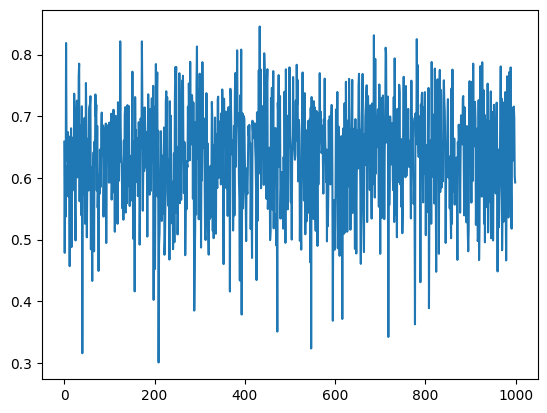

In [42]:
import matplotlib.pyplot as plt
import numpy as np

# Plot the scores
np.argmax(scores)

plt.plot(range(1000), scores)

In [47]:
print(np.argmax(scores))
#max r2 score is at random state 433
scores[np.argmax(scores)]

print(np.max(scores))

scores[433]

433
0.8457059005551886


0.8457059005551886

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= np.argmax(scores))
lr = LinearRegression()
pipe = make_pipeline(column_tr,lr)
pipe.fit(X_train,y_train)
y_pred = pipe.predict(X_test)
scores.append(r2_score(y_test,y_pred))
# print(r2_score(y_test,y_pred))
print(r2_score(y_test,y_pred),np.argmax(scores))

0.8457059005551886 433


In [54]:
import pickle as pk
print(pipe.predict(pd.DataFrame({'name': ['Maruti Suzuki Swift'], 'company': ['Maruti'], 'year': [2019], 'kms_driven': [100], 'fuel_type': ['Petrol']})))
pk.dump(pipe,open('LinearRegressionModel.pkl','wb'))

[458894.10212807]
